In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#Weight Initializer  
Dense() 생성 시 Kernel_initializer, bias_initializer로 설정  
'he_normal'
'lecun_normal'

In [3]:
#Data 준비
def get_sin_data(start=0, end=10, step=0.1):
   x = np.arange(start, end, step)
   np.random.shuffle(x)
   y = np.sin(x)

   split_index=int(x.shape[0]*0.6)

   train_x, test_x=x[:split_index], x[split_index:]
   train_y, test_y=y[:split_index], y[split_index:]

   return (train_x, train_y), (test_x, test_y)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.610975027084351
40/40 [==============================] - 0s 463us/sample - loss: 0.2011 - mean_squared_error: 0.2011
loss= 0.20112252831459046
mse= 0.20112252


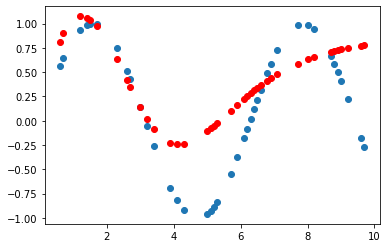

In [4]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()